In [1]:
%matplotlib inline
import os, sys
sys.path.append("/k2_data/swarced/")
import swarced as sw
import remove_EB as remEB
import matplotlib.pyplot as pl
import numpy as np
from astropy.io import fits, ascii

In [2]:
path = "/home/mhughes/Desktop/newEB2/output/"
epicID, campaign, inpath, outpath = "202083510", "0", path, path
period =3.3075922
center = 56729.917585+2400000.
pwid, swid, sep =  0.0190,0.0182,0.4999

3753 2229 2229


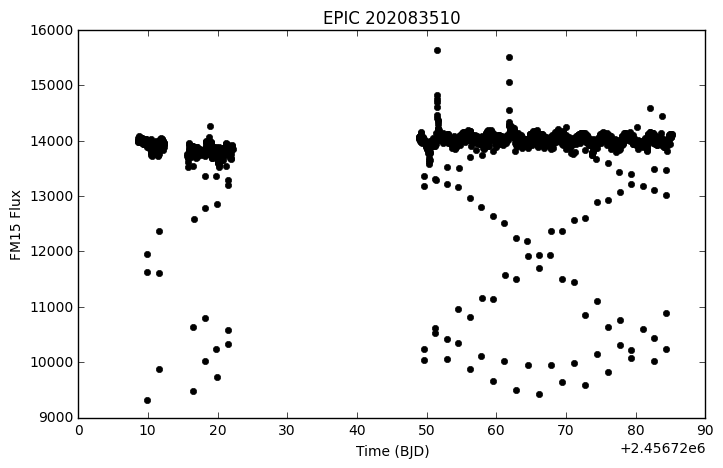

In [4]:
sw.plot_lc("202083510","0",inpath=path)

In [7]:
fn = "ktwo" + epicID + "-c0" + campaign + "_lpd-lc.fits"
f = fits.open(path + fn, mode='update')
#f[1].data['quality'][mask] = 16384

In [8]:
phase = remEB.find_phase(f[1].data['time']+f[1].header['BJDREFI'], period, center )
mask = remEB.clip_eclipses(phase, period, sep, pwid, swid)
mask = mask * ((f[1].data['time'] +f[1].header['BJDREFI'])> 2.45672e6 + 50)
f[1].data['quality'][np.logical_not(mask)]= 16384

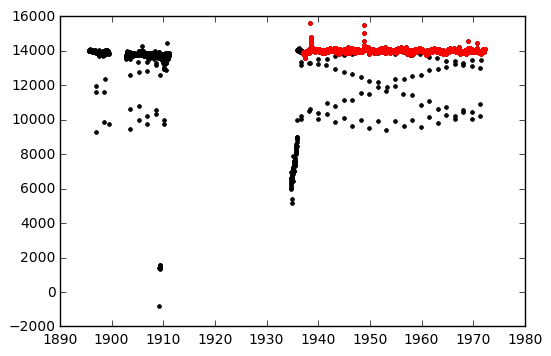

In [9]:
pl.plot(f[1].data['time'],f[1].data['flux'][:,9],'k.')
pl.plot(f[1].data['time'][f[1].data['quality']==0],f[1].data['flux'][:,9][f[1].data['quality']==0],'r.')

In [10]:
f.flush()
f.close()

3753 1587 1587


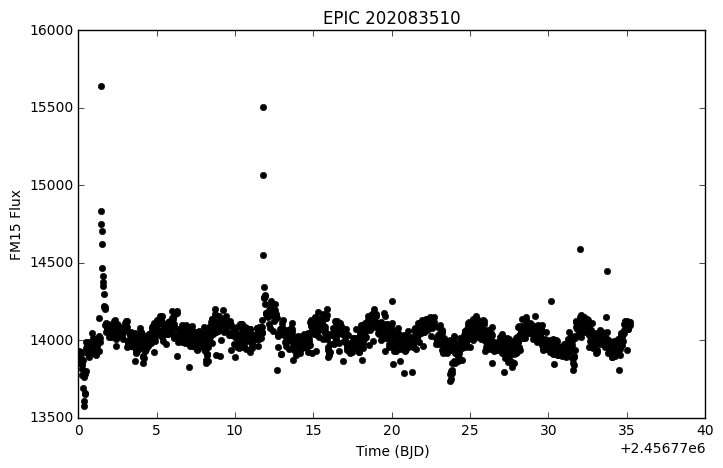

In [11]:
sw.plot_lc("202083510","0",inpath=path)

In [12]:
ttimes = ascii.read("/home/mhughes/Desktop/newEB2/parameters/times_ktwo202083510-c00_lpd-lc.txt")

In [13]:
ttimes['Transit times'] + f[1].header['BJDREFI']

<Column name='Transit times' dtype='float64' length=10>
2456731.4
2456739.2
2456747.0
2456754.8
2456762.6
2456770.4
2456778.2
2456786.0
2456793.8
2456801.6

3753 1587 1587


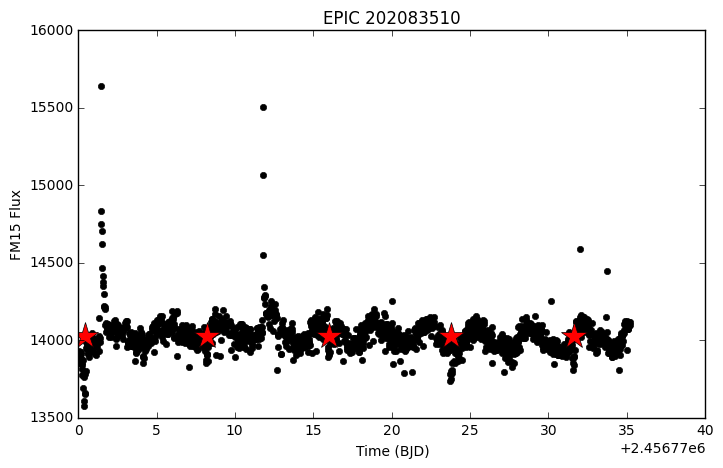

In [14]:
sw.plot_lc("202083510","0",inpath=path, mark_list = (ttimes['Transit times'] + f[1].header['BJDREFI'])[-5:])

3753 1587 1587


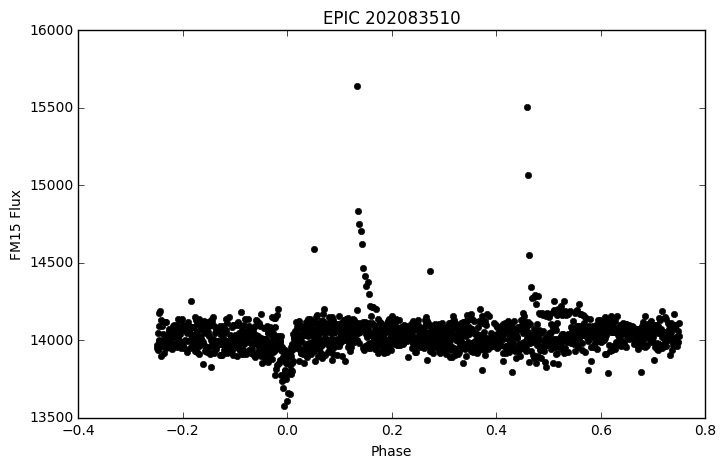

In [16]:
sw.plot_phase("202083510","0",7.8,1937.4+ f[1].header['BJDREFI'],inpath=path)

In [15]:
reload(sw)

<module 'swarced' from '/k2_data/swarced/swarced.py'>

In [18]:
query = sw.get_query(epicID,0)

In [19]:
query['light_curve_file'] = path + fn
query['durations'] = [0.05,0.1,0.2]
query['time_spacing']=0.02

In [20]:
query

{'basis_file': '/k2_data/elcs/c0.h5',
 'catalog_file': '/k2_data/catalogs/epic.h5',
 'durations': [0.05, 0.1, 0.2],
 'initial_time': 1940.0,
 'light_curve_file': '/home/mhughes/Desktop/newEB2/output/ktwo202083510-c00_lpd-lc.fits',
 'max_period': 70.0,
 'min_period': 0.5,
 'nbasis': 150,
 'time_spacing': 0.02}

In [21]:
result = sw.analyze(query)

Querying Data
Finished querying Data in 0.65s
Querying Likelihood
tau = 0.973419189453
163 190
181 163
182 181
182 182
tau = 0.973419189453
tau = 2.10992431641
342 411
350 342
369 350
368 369
368 368
tau = 2.10992431641
tau = 1.41680908203
1564 1798
1630 1564
1671 1630
1666 1671
1665 1666
1662 1665
1661 1662
1662 1661
1662 1662
tau = 1.36074829102
Finished querying Likelihood in 6.79s
Querying OneDSearch
Finished querying OneDSearch in 87.12s
Querying TwoDSearch
Finished querying TwoDSearch in 112.25s


Querying PeakDetect
Finished querying PeakDetect in 1.23s


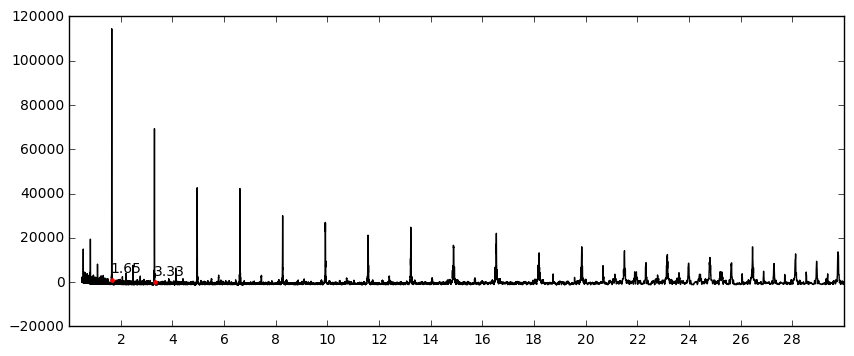

In [22]:
sw.plot_periodogram(result)

In [25]:
3.33/1.65

2.0181818181818185

In [17]:
result.response['peaks']

NameError: name 'result' is not defined